In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../..')
from src.camera.camera import chessboard_camera_calibration

## Camera Calibration

Finding intrinsic characteristics of a camera using OpenCV and many images of a chessboard

In [2]:
images = glob.glob('../../images/calibration/*.png')
mtx, dist, rvecs, tvecs = chessboard_camera_calibration(9, 6, images)

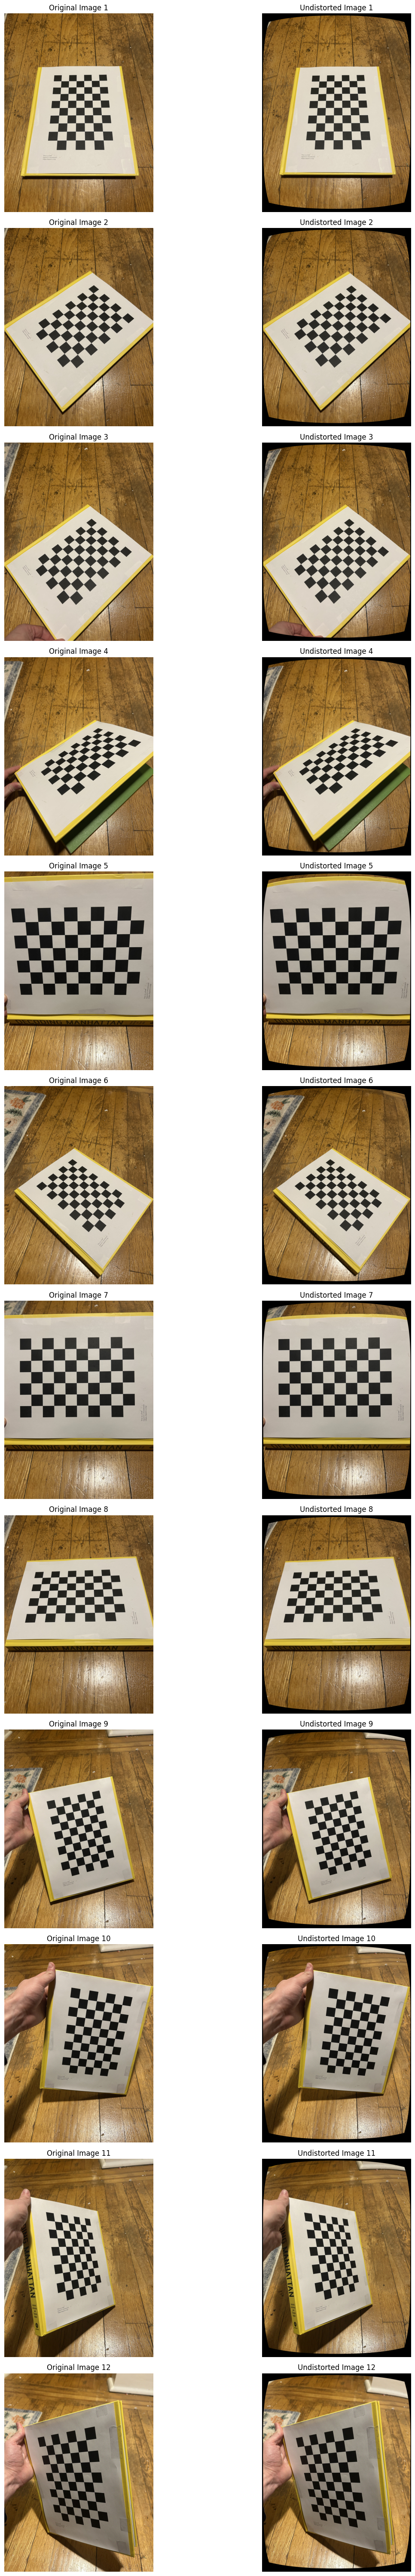

In [3]:
# Plot calibration images before and after undistortion
fig, axes = plt.subplots(len(images), 2, figsize=(15, len(images)*5))

for i, image_path in enumerate(images):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    dst = cv2.undistort(img, mtx, dist)
    
    # Plot original image
    axes[i,0].imshow(img)
    axes[i,0].set_title(f'Original Image {i+1}')
    axes[i,0].axis('off')
    
    # Plot undistorted image
    axes[i,1].imshow(dst)
    axes[i,1].set_title(f'Undistorted Image {i+1}')
    axes[i,1].axis('off')

plt.tight_layout()
plt.show()